In [1]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from PIL import ImageGrab
import matplotlib.pyplot as plt
import seaborn as sns

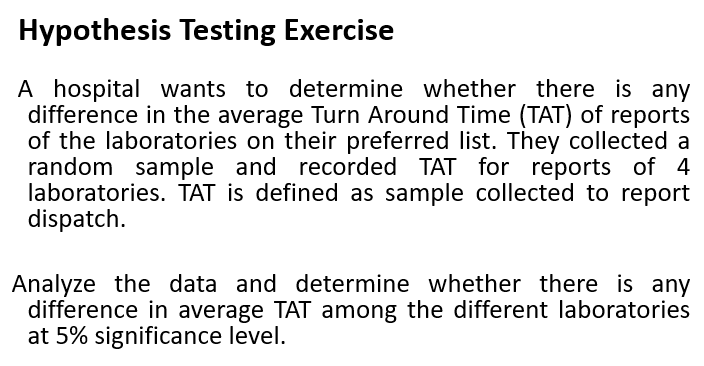

In [2]:
ImageGrab.grabclipboard()

## We are going to conduct a <font color='red'>ANOVA Test</font> on 4 Independent samples with Numerical Data

### We need to check whether the mean of any of these samples are different or the same?

## <font color='red'>Step 1
#### Make two Hypothesis one contradicting to other 
#### Null Hypothesis is want we want to prove

+ **Null Hypothesis:** $\mu_1 = \mu_2$ = $\mu_3$ = $\mu_4$
+ **Alternative Hypthosis:** Atleast One of them is Differente

## <font color='red'>Step 2
### Decide a cut-off value

+ **Significance 5%**
+ **alpha = 0.05**

## <font color='red'>Step 3 
### Collect evidence

### Importing Files



In [6]:
labtat = pd.read_csv('C:/Users\Moin Dalvi\Documents\EXcelR Study and Assignment Material\Data Science Assignments\Hypothesis testing 3\LabTAT.csv')
labtat.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


### Applying Descriptive Statistics

In [7]:
labtat.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


### Checking for Null Values

In [8]:
labtat.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

### Checking for Duplicate Values

In [9]:
labtat[labtat.duplicated()].shape

(0, 4)

In [10]:
labtat[labtat.duplicated()]

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4


### Checking the data type

In [11]:
labtat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


### Plotting the data

In [12]:
pplt.subplots(figsize = (16,9))
plt.subplot(221)
plt.boxplot(labtat['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.boxplot(labtat['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.boxplot(labtat['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.boxplot(labtat['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

NameError: name 'pplt' is not defined

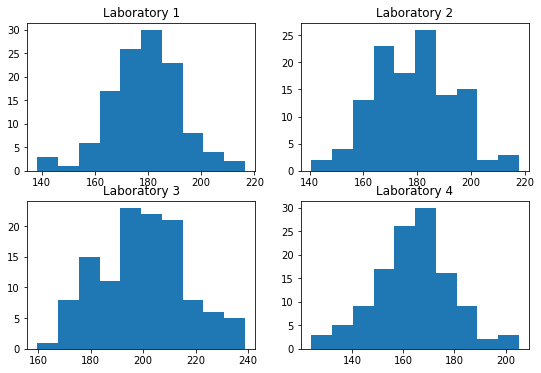

In [13]:
plt.subplots(figsize = (9,6))
plt.subplot(221)
plt.hist(labtat['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.hist(labtat['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.hist(labtat['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.hist(labtat['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

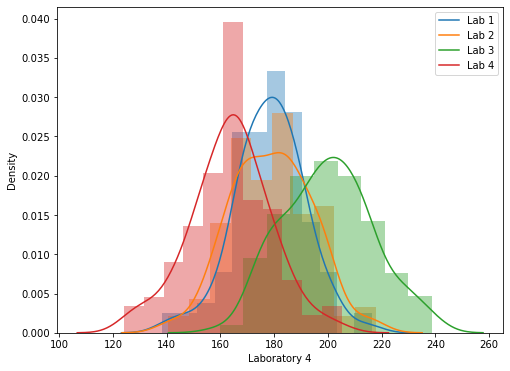

In [14]:
plt.figure(figsize = (8,6))
labels = ['Lab 1', 'Lab 2','Lab 3', 'Lab 4']
sns.distplot(labtat['Laboratory 1'], kde = True)
sns.distplot(labtat['Laboratory 2'],hist = True)
sns.distplot(labtat['Laboratory 3'],hist = True)
sns.distplot(labtat['Laboratory 4'],hist = True)
plt.legend(labels)

### Plotting Q-Q plot to check whether the distribution follows normal distribution or not

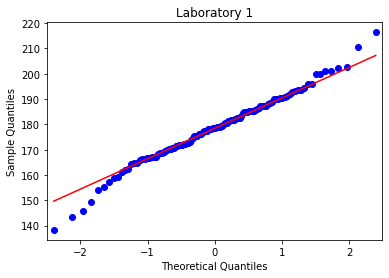

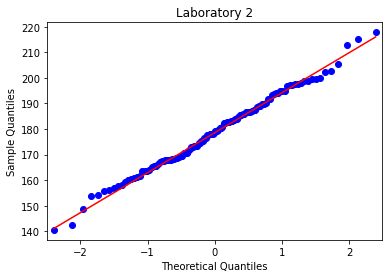

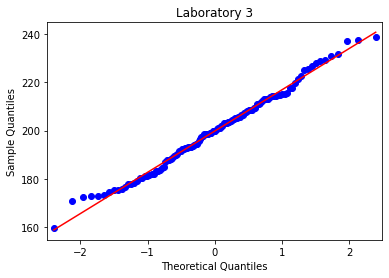

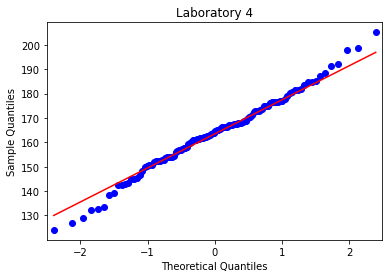

In [15]:
sm.qqplot(labtat['Laboratory 1'], line = 'q')
plt.title('Laboratory 1')
sm.qqplot(labtat['Laboratory 2'], line = 'q')
plt.title('Laboratory 2')
sm.qqplot(labtat['Laboratory 3'], line = 'q')
plt.title('Laboratory 3')
sm.qqplot(labtat['Laboratory 4'], line = 'q')
plt.title('Laboratory 4')
plt.show()

## <font color='red'>Step 4

### Compare Evidences with Hypothesis using t-statictic

In [16]:
test_statistic , p_value = stats.f_oneway(labtat.iloc[:,0],labtat.iloc[:,1],labtat.iloc[:,2],labtat.iloc[:,3])
print('p_value =',p_value)

p_value = 2.1156708949992414e-57


### Compare p_value with '$\alpha$ '(Significane Level)

### If p_value is $\neq$ '$\alpha$ ' we failed to reject Null Hypothesis because of lack of evidence 
### If p_value is = '$\alpha$ ' we reject Null Hypothesis

### interpreting p-value

In [17]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.000
We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories


## Hence, We fail to reject Null Hypothesis because of lack evidence, there is no significant difference between the samples